In [1]:
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt

**Вариант 9**

**Задание №1(6.1.9)**

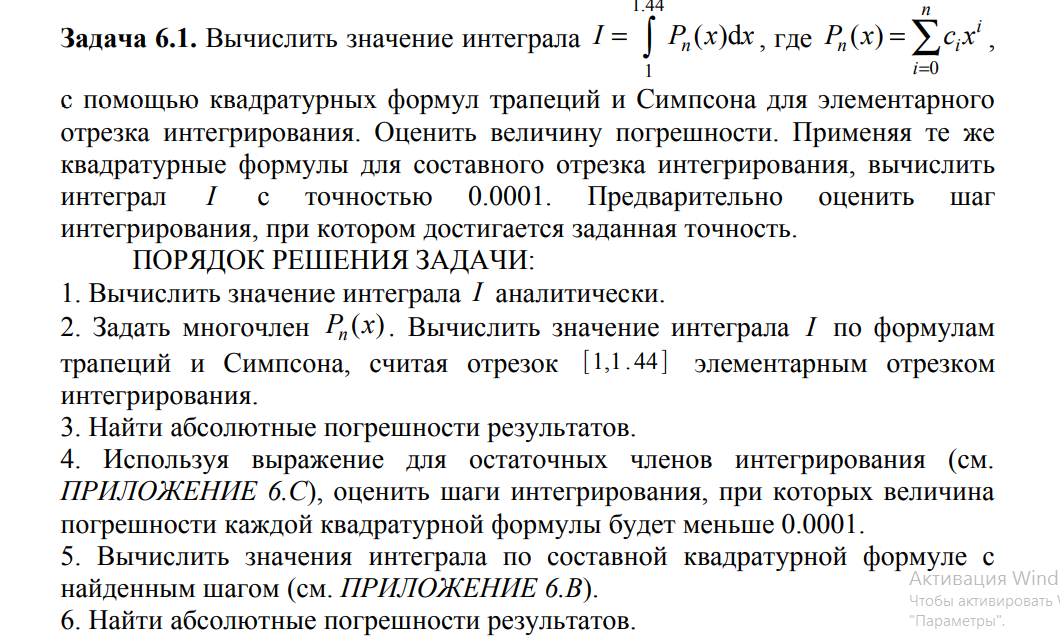

In [4]:
Image('6.1.9.png')


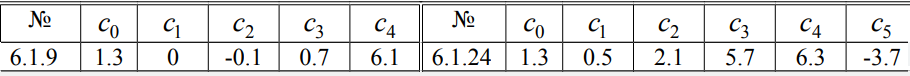

In [5]:
Image('6.1.9(1).png')

In [9]:
def P(x):
    return(1.3 - 0.1*x**2 + 0.7*x**3 + 6.1 * x**4)

a = 1
b = 1.44

** Значение интеграла, вычисленное аналитически: 7.4172**

In [51]:
I = 7.4172

**Вычислим значение интеграла, считая отрезок [a,b] элементарным.**

In [52]:
I_t_e = (b-a)/2 *(P(1) + P(1.44))
I_s_e = (b-a)/6 *(P(1) + P(1.44) + 4*P((a+b)/2))
print('Значение интеграла(ф-ла трапеций):', I_t_e)
print('Значение интеграла(ф-ла Симпсона):', I_s_e)

Значение интеграла(ф-ла трапеций): 8.230576696319998
Значение интеграла(ф-ла Симпсона): 7.418025260799998


In [53]:
print('Абсолютная погрешность(ф-ла трапеций):', np.abs(I - I_t_e))
print('Абсолютная погрешность(ф-ла Симпсона):', np.abs(I - I_s_e))

Абсолютная погрешность(ф-ла трапеций): 0.813376696319998
Абсолютная погрешность(ф-ла Симпсона): 0.0008252607999974515


**Оценим шаги интегрирования, при которой погрешность каждой квадратурной формулы будет меньше 0.0001.
Поскольку ф-ла Симпсона точнее формулы трапеций, то достаточно провести эту процедууру только для формулы трапеций.**

In [59]:
def der_2_P(x):
    return(2*0.1 + 6*0.7*x + 12*6.1 * x**2)

M = der_2_P(1.4)

h = (24*0.0001/(M * (b-a)))**1/2

n = (b-a)/h
print('Шаг:', h)
print('Количество разбиений:', int(n))

Шаг: 1.8236283883015463e-05
Количество разбиений: 24127


In [62]:
def I_t(n, h, a, b):
    t = [1 + i*h for i in range(0,int(n))]
    t = np.append(t, b)
    I = 0
    for i in range(0, int(n+1)):
        I += h/2 *(P(t[i-1]) + P(t[i]))
    return(I) 

def I_s(n, h, a, b):
    t = [1 + i*h for i in range(0,int(n))]
    t = np.append(t, b)
    I = 0
    for i in range(0, int(n+1)):
        I += h/6 *(P(t[i-1]) + P(t[i]) + 4*P((t[i] + t[i-1])/2))
    return(I)   

In [63]:
print('Значение интеграла(ф-ла трапеций):', I_t(n, h, a, b))
print('Значение интеграла(ф-ла Симпсона):', I_s(n, h, a, b))

Значение интеграла(ф-ла трапеций): 7.417140469555655
Значение интеграла(ф-ла Симпсона): 7.417106791064787


In [65]:
print('Абсолютная погрешность(ф-ла трапеций):', np.abs(I - I_t(n, h, a, b)))
print('Абсолютная погрешность(ф-ла Симпсона):', np.abs(I - I_s(n, h, a, b)))

Абсолютная погрешность(ф-ла трапеций): 5.953044434559018e-05
Абсолютная погрешность(ф-ла Симпсона): 9.320893521280738e-05


**Как видно погрешности меньше 0.0001**

**Задание №2(6.4.3)**


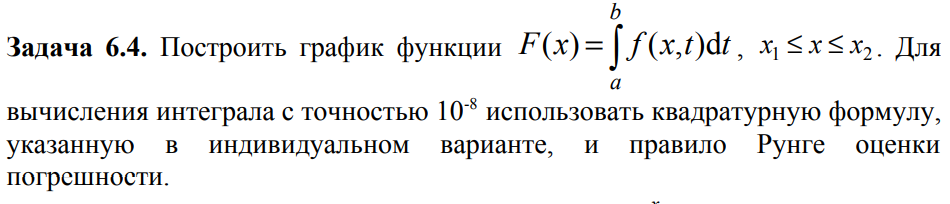

In [66]:
Image('6.4.3.png')

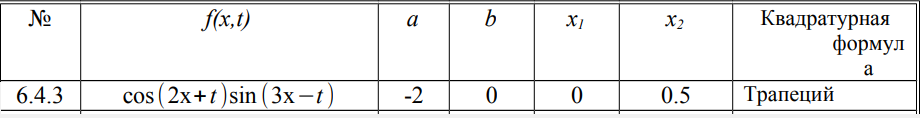

In [67]:
Image('6.4.3(1).png')

In [97]:
a_1 = -2
b_1 = 0

def I_t_1(h, a, b, x):
    n = (b-a)/h
    t = [1 + i*h for i in range(0,int(n))]
    t = np.append(t, b)
    I = 0
    for i in range(0, int(n+1)):
        I += h/2 *(np.cos(2*x + (t[i-1])) * np.sin(3*x - (t[i-1])) + np.cos(2*x + (t[i])) * np.sin(3*x - (t[i])))
    return(I) 

def f(x,h):
    return(I_t_1(h, a, b, x))


**Используем правило Рунге для оценки погрешности вычисления интеграла, для этого будем считать значение нашей функции в нуле.**

In [98]:
1/3 * (f(0, 0.000001) - f(0, 0.000002))

5.422216011371124e-08

**При h = 1e-5 мы получаем точность порядка 1e-8**

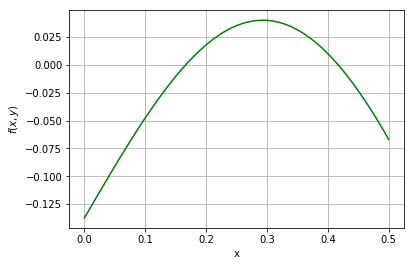

In [99]:
x_2 = np.arange(0, 0.51, 0.01)
plt.plot(x_2, f(x_2, 1e-5), c = 'g')
plt.xlabel('x')
plt.ylabel('$f(x,y)$')
plt.grid()

**Задание №3(6.5.3)**

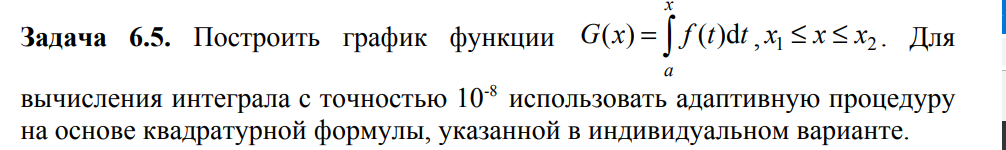

In [100]:
Image('6.5.3.png')

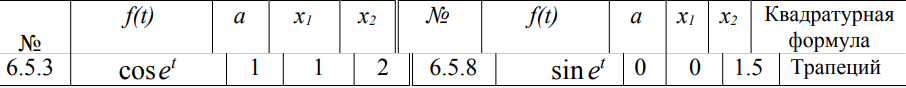

In [101]:
Image('6.5.3(1).png')

In [102]:
a = 1

def f_1(x):
    return(np.cos(np.exp(x)))

**Используем адаптивную процедуру на основе формулы трапеций**

In [165]:
def h_i(x1, x, a, h, eps):
    I_tr = h/2 * (f_1(x1) + f_1(x1 + h))
    I_i = h/4 *(f_1(x1) + f_1(x1 + h) + 2*f_1((2*x1 + h)/2))
    eps1 = abs(1/3 * (I_tr - I_i))
    
    while(1):
        if(eps1 <= h * eps/(x-a)):
            break
        I_tr = h/2 * (f_1(x1) + f_1(x1 + h))
        I_i = h/4 *(f_1(x1) + f_1(x1 + h) + 2*f_1((2*x1 + h)/2))
        h = h/2
        eps1 = abs(1/3 * (I_tr - I_i))
        
    return(h)
        

def I_t_2(a, x, eps = 1e-6):
    t = [a]
    t_k = a
    I = 0
    h_0 = 0.0001
    h = h_0
    t.append(a+h_0)
    
    if (x == a):
        return(0)
    
    
    while(1):
        h = h_i(t[-1], x, a, h_0, eps)
        if(t[-1] + h > x):
            break
        t.append(t[-1] + h)
        I += h/2 *(f_1(t[-1]) + f_1(t[-2]))
    
    h = x - t[-1]
    I += h/2 *(f_1(t[-1]) + f_1(t[-2]))
    
        
    return(I) 

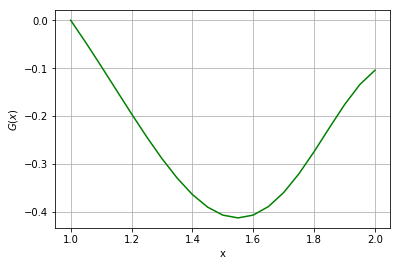

In [168]:
t_3 = np.arange(1,2.05,0.05)
y_3 = [I_t_2(a,s) for s in t_3]
plt.plot(t_3, y_3, c = 'g')
plt.xlabel('x')
plt.ylabel('$G(x)$')
plt.grid()

**Задание №4(6.6.9)**

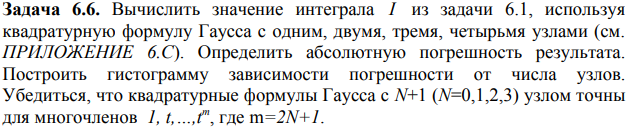

In [169]:
Image('6.6.9.png')

In [170]:
def Gauss(n, a, b):
    A = [[2], [1, 1], [0.55555555555556, 0.88888888888888, 0.55555555555556] , [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]
    t = [[0], [-0.577350269189626, 0.577350269189626], [-0.77459666929954, 0, 0.77459666929954], [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]
    I = 0
    for i in range(0, n):
        I+= (b-a)/2 * A[n-1][i] * P((a+b)/2 + (b-a)/2 * t[n-1][i])
    return(I)

In [175]:
print('Абсолютная погрешность(1 узел):', np.abs(I - Gauss(1,1,1.44)))
print('Абсолютная погрешность(2 узла):', np.abs(I - Gauss(2,1,1.44)))
print('Абсолютная погрешность(3 узла):', np.abs(I - Gauss(3,1,1.44)))
print('Абсолютная погрешность(4 узла):', np.abs(I - Gauss(4,1,1.44)))

Абсолютная погрешность(1 узел): 0.40545045696000237
Абсолютная погрешность(2 узла): 0.0005719460977795521
Абсолютная погрешность(3 узла): 1.3063277701341747e-05
Абсолютная погрешность(4 узла): 1.3063338669461189e-05


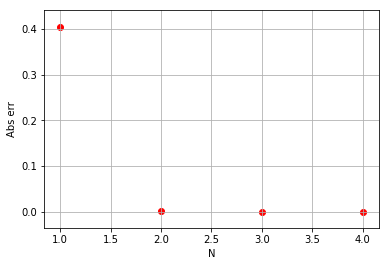

In [182]:
N = np.arange(1,5,1)
Abs_err = [np.abs(I - Gauss(i,1,1.44)) for i in N]
plt.scatter(N,Abs_err, c = 'r')
plt.xlabel('N')
plt.ylabel('Abs err')
plt.grid()

**Убедимся, что квадратурные формулы Гаусса точны для многочленов, указанных в задании**

In [194]:
def Gauss_2(n, a, b, m):
    A = [[2], [1, 1], [0.55555555555556, 0.88888888888888, 0.55555555555556] , [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]
    t = [[0], [-0.577350269189626, 0.577350269189626], [-0.77459666929954, 0, 0.77459666929954], [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]
    I = 0
    for i in range(0, n):
        I+= (b-a)/2 * A[n-1][i] * ((a+b)/2 + (b-a)/2 * t[n-1][i])**m
    return(I)

for i in range(4):
    m = 2*i + 1
    print('Количество узлов', i+1)
    print('Ошибка:')
    for k in range(0, m + 1):
        print(abs(1/(k+1) - Gauss_2(i+1, 0, 1, k)))

Количество узлов 1
Ошибка:
0.0
0.0
Количество узлов 2
Ошибка:
0.0
0.0
5.551115123125783e-17
1.1102230246251565e-16
Количество узлов 3
Ошибка:
0.0
0.0
1.2492507028838418e-11
1.873873278768201e-11
2.2486346118455458e-11
2.4984708746345063e-11
Количество узлов 4
Ошибка:
0.0
0.0
5.551115123125783e-17
1.1102230246251565e-16
1.6653345369377348e-16
1.3877787807814457e-16
1.6653345369377348e-16
1.942890293094024e-16


**Видно, что значения действительно совпадают**

**Задание №5(6.9.9)**

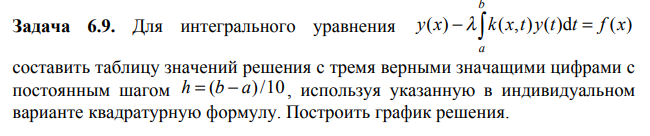

In [195]:
Image('6.9.png')

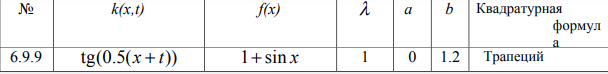

In [196]:
Image('6.9(1).png')

**Подставим в интегральное уравнение в формулу трапеций, тем самым получим систему линейных уравнений на $y_i = y(t_i)$:
    $$ y_i - \lambda h \left( \frac{k(x_i, a)y(a) + k(x_i, b)y(b)}{2} + \sum_{j = 1}^{n-1}k(x_i, x_j)y_j)\right) = f(x_i)$$** 

In [198]:
a = 0 
b = 1.2
lam = 1

def k(x,t):
    return(np.tan(0.5*(x+t)))

def f(x):
    return(1 + np.sin(x))

h = (b-a)/10

In [208]:
t = [a + h*i for i in range(0,11)]
n = len(t)
A = np.zeros([n,n])

for i in range(0,n):
    for j in range(0, n):
        A[i,j] = k(t[i], t[j])
A = np.eye(n,n) - lam*h*A
b = f(t)

y = np.linalg.solve(A,b)

print('x', '   y')
for i in range(0, n):
    print(t[i], y[i])
        

x    y
0.0 -2.7119708352315977
0.12 -3.2561746002545346
0.24 -3.845684471655953
0.36 -4.493094433160682
0.48 -5.21378684948331
0.6 -6.027076737477898
0.72 -6.957965703990283
0.84 -8.039926907283258
0.96 -9.319517194447275
1.08 -10.864418677702417
1.2 -12.778394107263798


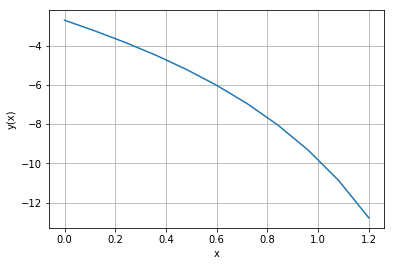

In [209]:
plt.plot(t, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()